In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel(r"C:\Users\CHIRAG KOTHARI\Downloads\Data_Train.xlsx")

In [3]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
from nltk.tokenize import word_tokenize 

In [5]:

list1=[]
for name in df["Name"]:
    brand=word_tokenize(name)
    list1.append(brand[0])
df["Brand"]=list1
list1=[]
for name in df["Name"]:
    brand=word_tokenize(name)
    list1.append(brand[1])
df["Model"]=list1

In [6]:
list2=[]
for item in df["Name"]:
    name=word_tokenize(item)
    i=len(name)
    modelname=""
    while i>2:
        modelname=modelname+name[len(name)-i+2]+" "
        i-=1
    list2.append(modelname)
df["Type"]=list2 

In [7]:
df1=df.sort_values("Brand")
df1=df1.drop(["Name"],axis=1)
df1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Type
1221,Chennai,2003,80000,Diesel,Manual,Third,12.8 kmpl,1489 CC,35.5 bhp,5.0,1.35,Ambassador,Classic,Nova Diesel
3702,Delhi,2010,59000,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,10.00,Audi,A4,2.0 TDI Multitronic
5561,Bangalore,2014,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,24.50,Audi,A4,3.0 TDI Quattro
596,Kochi,2016,58953,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,24.22,Audi,A6,2011-2015 35 TFSI Technology
1583,Kochi,2019,6773,Diesel,Automatic,First,14.75 kmpl,2967 CC,245 bhp,7.0,72.94,Audi,Q7,45 TDI Quattro Premium Plus


In [8]:
df1.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [9]:
df1[df1["Price"]>100].count()

Location             2
Year                 2
Kilometers_Driven    2
Fuel_Type            2
Transmission         2
Owner_Type           2
Mileage              2
Engine               2
Power                2
Seats                2
Price                2
Brand                2
Model                2
Type                 2
dtype: int64

In [10]:
df1=df1[df1.Price<=100]

In [11]:
len(df1)

6017

In [12]:
df1=df1[df1.Price>=1]

In [13]:
len(df1)

5940

In [14]:
df1.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               34
Power                34
Seats                40
Price                 0
Brand                 0
Model                 0
Type                  0
dtype: int64

In [15]:
df1[df1["Mileage"].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Type
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,Mahindra,E,Verito D4
4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,Toyota,Prius,2009-2016 Z4


In [16]:
df1.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               34
Power                34
Seats                40
Price                 0
Brand                 0
Model                 0
Type                  0
dtype: int64

In [17]:
df2=df1
df2=df2.ffill(axis=0)
df3=df2
df4=df3[df3.Power!="null bhp"]
#calculating mean
list_power=[]
for item in df4.Power:
    mil=item.split(" ")
    y=float(mil[0])
    list_power.append(y)
df4["Power_"]=list_power
y=df4.Power_.mean()

#replacing mean on "null bhp"
power=[]
for item in df2["Power"]:
    if item=="null bhp":
        power.append(str(y)+" bhp")
    else:
        power.append(item)
df2["Power"]=power


F:\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [18]:
df2.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Type
1221,Chennai,2003,80000,Diesel,Manual,Third,12.8 kmpl,1489 CC,35.5 bhp,5.0,1.35,Ambassador,Classic,Nova Diesel
3702,Delhi,2010,59000,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,10.00,Audi,A4,2.0 TDI Multitronic
5561,Bangalore,2014,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,24.50,Audi,A4,3.0 TDI Quattro
596,Kochi,2016,58953,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,24.22,Audi,A6,2011-2015 35 TFSI Technology
1583,Kochi,2019,6773,Diesel,Automatic,First,14.75 kmpl,2967 CC,245 bhp,7.0,72.94,Audi,Q7,45 TDI Quattro Premium Plus


In [19]:
df2.Brand.unique()

array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu',
       'Jaguar', 'Jeep', 'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda',
       'Smart', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [20]:
brand=list(df2.Brand.unique())
brand

['Ambassador',
 'Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'ISUZU',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Land',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Renault',
 'Skoda',
 'Smart',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [21]:
df2.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
Type                 0
dtype: int64

In [22]:
df2.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
Type                 0
dtype: int64

In [23]:
df2.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Type
1221,Chennai,2003,80000,Diesel,Manual,Third,12.8 kmpl,1489 CC,35.5 bhp,5.0,1.35,Ambassador,Classic,Nova Diesel
3702,Delhi,2010,59000,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,10.00,Audi,A4,2.0 TDI Multitronic
5561,Bangalore,2014,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,24.50,Audi,A4,3.0 TDI Quattro
596,Kochi,2016,58953,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,24.22,Audi,A6,2011-2015 35 TFSI Technology
1583,Kochi,2019,6773,Diesel,Automatic,First,14.75 kmpl,2967 CC,245 bhp,7.0,72.94,Audi,Q7,45 TDI Quattro Premium Plus
2505,Hyderabad,2012,79000,Diesel,Automatic,First,12.07 kmpl,2967 CC,241.4 bhp,7.0,39.00,Audi,Q7,3.0 TDI Quattro Premium Plus
2506,Coimbatore,2016,39644,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,25.75,Audi,A4,35 TDI Premium
4251,Bangalore,2015,63000,Diesel,Automatic,First,13.22 kmpl,2967 CC,241.4 bhp,5.0,34.50,Audi,Q5,3.0 TDI Quattro
1562,Bangalore,2015,21000,Diesel,Automatic,First,12.07 kmpl,2967 CC,241.4 bhp,7.0,48.00,Audi,Q7,35 TDI Quattro Technology
216,Delhi,2012,56000,Diesel,Automatic,First,11.8 kmpl,2967 CC,246.7 bhp,5.0,45.00,Audi,A8,L 3.0 TDI quattro


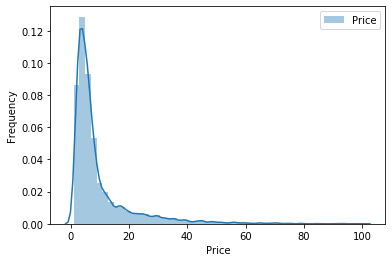

In [24]:
sns.distplot(df2.Price,label="Price",kde=True)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend(labels=["Price"])
plt.show()

In [25]:
#it can be seen that most of the car prices are between 0-20

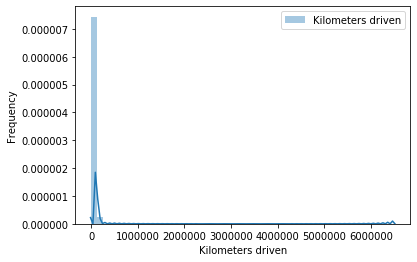

In [26]:
sns.distplot(df2.Kilometers_Driven,label="Kilometers driven",kde=True)
plt.xlabel("Kilometers driven")
plt.ylabel("Frequency")
plt.legend(labels=["Kilometers driven"])
plt.show()

In [27]:
#this shows that most of the cars odometer value is around 0-1,00,000

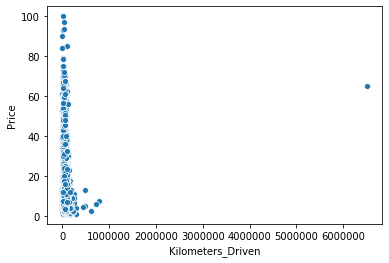

In [28]:
sns.scatterplot(x=df2.Kilometers_Driven,y=df2.Price)

In [29]:
#as the odometer value increases price decreases

In [30]:
df2.Location.unique()

array(['Chennai', 'Delhi', 'Bangalore', 'Kochi', 'Hyderabad',
       'Coimbatore', 'Pune', 'Kolkata', 'Mumbai', 'Ahmedabad', 'Jaipur'],
      dtype=object)

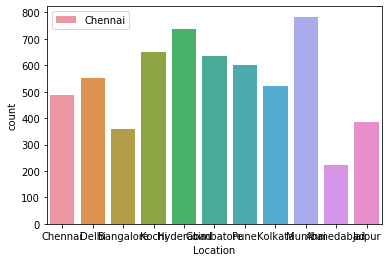

In [31]:
sns.countplot(df2.Location)
plt.legend(labels=['Chennai', 'Delhi', 'Bangalore', 'Kochi', 'Hyderabad',
       'Coimbatore', 'Pune', 'Kolkata', 'Mumbai', 'Ahmedabad', 'Jaipur'])
plt.show()

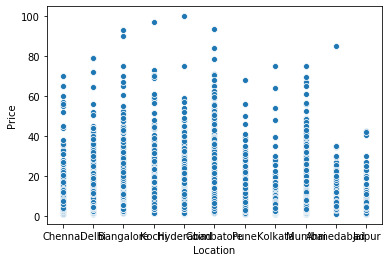

In [32]:
sns.scatterplot(x=df2.Location,y=df2.Price)

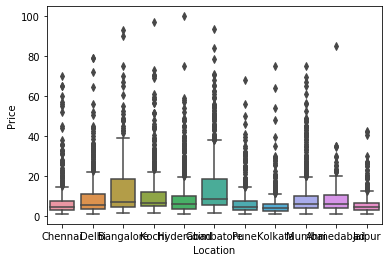

In [33]:
sns.boxplot(x=df2.Location,y=df2.Price)

In [34]:
#looks like location doesn't have a significant impact on the price

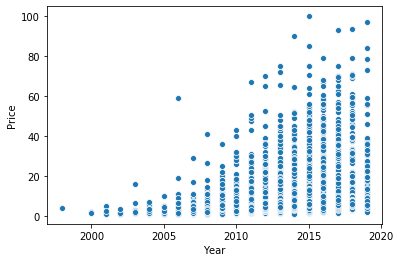

In [35]:
sns.scatterplot(x=df2.Year,y=df2.Price)

In [36]:
#it shows that the price increases as the year increases

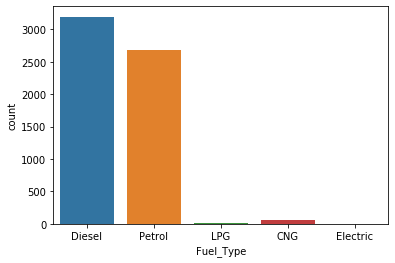

In [37]:
sns.countplot(df2.Fuel_Type)

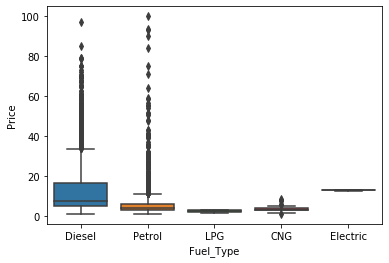

In [38]:
sns.boxplot(x=df2.Fuel_Type,y=df2.Price)

In [39]:
#diesel prices are more 

In [40]:
df2[df2.Fuel_Type=="Electric"]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Type
4446,Chennai,2016,50000,Electric,Automatic,First,15.1 kmpl,72 CC,41 bhp,5.0,13.00,Mahindra,E,Verito D4
4904,Mumbai,2011,44000,Electric,Automatic,First,13.68 kmpl,1798 CC,73 bhp,5.0,12.75,Toyota,Prius,2009-2016 Z4


In [41]:
#electric cars have higher price

In [42]:
df2.Brand.unique()

array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu',
       'Jaguar', 'Jeep', 'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda',
       'Smart', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [43]:
df2.Brand.value_counts()

Maruti           1178
Hyundai          1089
Honda             607
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              297
Mahindra          272
BMW               267
Audi              236
Skoda             173
Tata              171
Renault           145
Chevrolet         116
Nissan             91
Land               59
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Smart               1
Isuzu               1
Ambassador          1
Name: Brand, dtype: int64

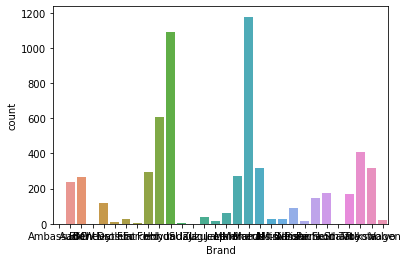

In [44]:
sns.countplot(df2.Brand)

In [45]:
#maruti and hyndai have the maximum no. of cars

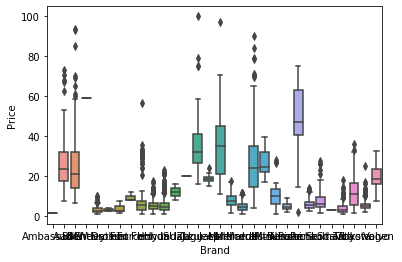

In [46]:
sns.boxplot(x=df2.Brand,y=df2.Price)

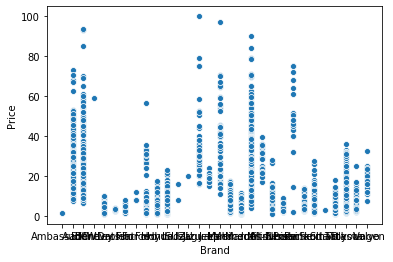

In [47]:
sns.scatterplot(x=df2.Brand,y=df2.Price)

In [48]:
#brand have a significant impact on the pricing

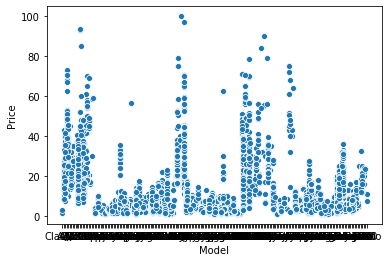

In [49]:
sns.scatterplot(x=df2.Model,y=df2.Price)

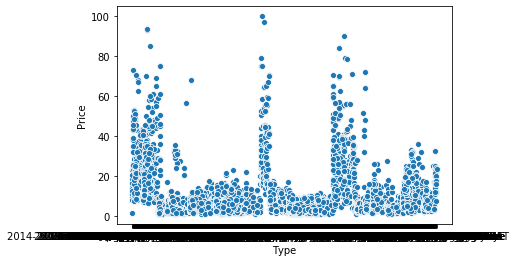

In [50]:
sns.scatterplot(x=df2.Type,y=df2.Price)

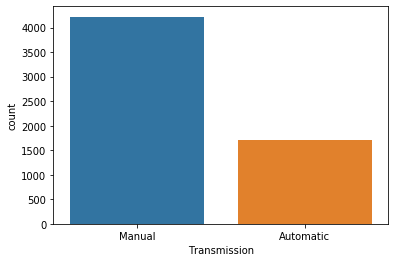

In [51]:
sns.countplot(df2.Transmission)

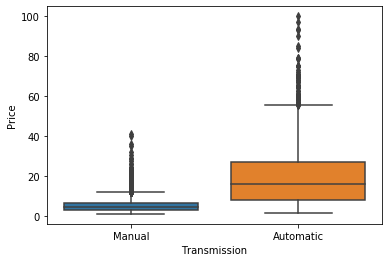

In [52]:
sns.boxplot(x=df2.Transmission,y=df2.Price)

In [53]:
#automatic transmission has more price 

In [54]:
df2.Owner_Type.unique()

array(['Third', 'First', 'Second', 'Fourth & Above'], dtype=object)

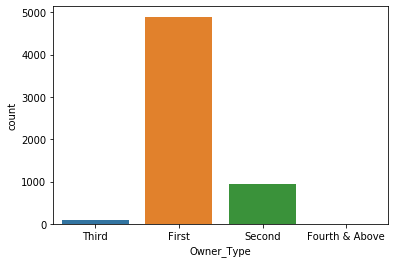

In [55]:
sns.countplot(df2.Owner_Type)

In [56]:
#first owners are more 

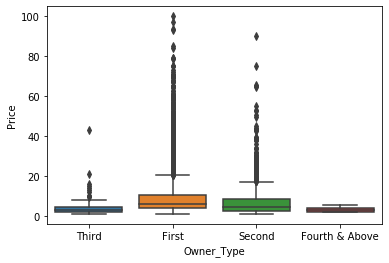

In [57]:
sns.boxplot(x=df2.Owner_Type,y=df2.Price)

In [58]:
#cars of first and second ownership have more price

In [59]:
df3=df2

In [60]:
list_mileage=[]
for item in df3.Mileage:
    mil=item.split(" ")
    y=float(mil[0])
    list_mileage.append(y)
df3["Mileage_"]=list_mileage

list_engine=[]
for item in df3.Engine:
    mil=item.split(" ")
    y=float(mil[0])
    list_engine.append(y)
df3["Engine_"]=list_engine

list_power=[]
for item in df3.Power:
    mil=item.split(" ")
    y=float(mil[0])
    list_power.append(y)
df3["Power_"]=list_power

In [61]:
df3.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Type,Mileage_,Engine_,Power_
1221,Chennai,2003,80000,Diesel,Manual,Third,12.8 kmpl,1489 CC,35.5 bhp,5.0,1.35,Ambassador,Classic,Nova Diesel,12.80,1489.0,35.50
3702,Delhi,2010,59000,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,10.00,Audi,A4,2.0 TDI Multitronic,16.55,1968.0,140.00
5561,Bangalore,2014,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,24.50,Audi,A4,3.0 TDI Quattro,14.94,2967.0,241.40
596,Kochi,2016,58953,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,24.22,Audi,A6,2011-2015 35 TFSI Technology,13.53,1984.0,177.01
1583,Kochi,2019,6773,Diesel,Automatic,First,14.75 kmpl,2967 CC,245 bhp,7.0,72.94,Audi,Q7,45 TDI Quattro Premium Plus,14.75,2967.0,245.00


In [62]:
df3=df3.drop(["Mileage","Engine","Power"],axis=1)
df3.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Type,Mileage_,Engine_,Power_
1221,Chennai,2003,80000,Diesel,Manual,Third,5.0,1.35,Ambassador,Classic,Nova Diesel,12.80,1489.0,35.50
3702,Delhi,2010,59000,Diesel,Automatic,First,5.0,10.00,Audi,A4,2.0 TDI Multitronic,16.55,1968.0,140.00
5561,Bangalore,2014,30000,Diesel,Automatic,First,5.0,24.50,Audi,A4,3.0 TDI Quattro,14.94,2967.0,241.40
596,Kochi,2016,58953,Petrol,Automatic,First,5.0,24.22,Audi,A6,2011-2015 35 TFSI Technology,13.53,1984.0,177.01
1583,Kochi,2019,6773,Diesel,Automatic,First,7.0,72.94,Audi,Q7,45 TDI Quattro Premium Plus,14.75,2967.0,245.00


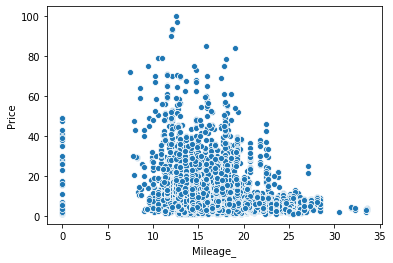

In [63]:
sns.scatterplot(x=df3.Mileage_,y=df3.Price)

In [64]:
 #price seem to linearky decrease as mileage increases after 5

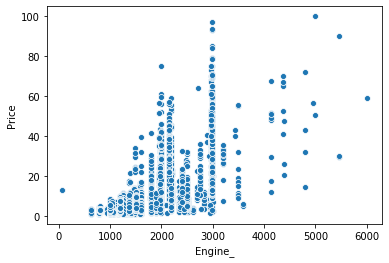

In [65]:
sns.scatterplot(x=df3.Engine_,y=df3.Price)

In [66]:
#price linearly increases as engine capicity increases

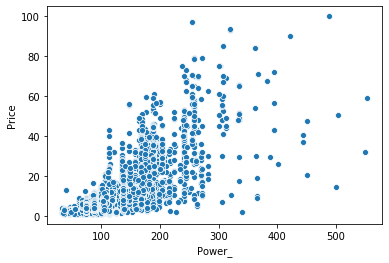

In [67]:
sns.scatterplot(x=df3.Power_,y=df3.Price)

In [68]:
#price linearly increases as power increases

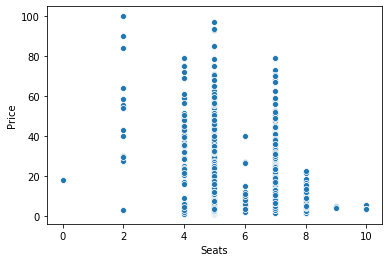

In [69]:
sns.scatterplot(x=df3.Seats,y=df3.Price)

In [70]:
df3=df3.drop(["Location"],axis=1)
df3.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Type,Mileage_,Engine_,Power_
1221,2003,80000,Diesel,Manual,Third,5.0,1.35,Ambassador,Classic,Nova Diesel,12.80,1489.0,35.50
3702,2010,59000,Diesel,Automatic,First,5.0,10.00,Audi,A4,2.0 TDI Multitronic,16.55,1968.0,140.00
5561,2014,30000,Diesel,Automatic,First,5.0,24.50,Audi,A4,3.0 TDI Quattro,14.94,2967.0,241.40
596,2016,58953,Petrol,Automatic,First,5.0,24.22,Audi,A6,2011-2015 35 TFSI Technology,13.53,1984.0,177.01
1583,2019,6773,Diesel,Automatic,First,7.0,72.94,Audi,Q7,45 TDI Quattro Premium Plus,14.75,2967.0,245.00


In [71]:
dummy=pd.get_dummies(df3.Fuel_Type)
dummy.head()

,CNG,Diesel,Electric,LPG,Petrol
1221,0,1,0,0,0
3702,0,1,0,0,0
5561,0,1,0,0,0
596,0,0,0,0,1
1583,0,1,0,0,0


In [72]:
df3=pd.concat([df3,dummy],axis=1)
df3.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Type,Mileage_,Engine_,Power_,CNG,Diesel,Electric,LPG,Petrol
1221,2003,80000,Diesel,Manual,Third,5.0,1.35,Ambassador,Classic,Nova Diesel,12.80,1489.0,35.50,0,1,0,0,0
3702,2010,59000,Diesel,Automatic,First,5.0,10.00,Audi,A4,2.0 TDI Multitronic,16.55,1968.0,140.00,0,1,0,0,0
5561,2014,30000,Diesel,Automatic,First,5.0,24.50,Audi,A4,3.0 TDI Quattro,14.94,2967.0,241.40,0,1,0,0,0
596,2016,58953,Petrol,Automatic,First,5.0,24.22,Audi,A6,2011-2015 35 TFSI Technology,13.53,1984.0,177.01,0,0,0,0,1
1583,2019,6773,Diesel,Automatic,First,7.0,72.94,Audi,Q7,45 TDI Quattro Premium Plus,14.75,2967.0,245.00,0,1,0,0,0


In [73]:
dummy=pd.get_dummies(df3.Transmission)
df3=pd.concat([df3,dummy],axis=1)
df3.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Type,Mileage_,Engine_,Power_,CNG,Diesel,Electric,LPG,Petrol,Automatic,Manual
1221,2003,80000,Diesel,Manual,Third,5.0,1.35,Ambassador,Classic,Nova Diesel,12.80,1489.0,35.50,0,1,0,0,0,0,1
3702,2010,59000,Diesel,Automatic,First,5.0,10.00,Audi,A4,2.0 TDI Multitronic,16.55,1968.0,140.00,0,1,0,0,0,1,0
5561,2014,30000,Diesel,Automatic,First,5.0,24.50,Audi,A4,3.0 TDI Quattro,14.94,2967.0,241.40,0,1,0,0,0,1,0
596,2016,58953,Petrol,Automatic,First,5.0,24.22,Audi,A6,2011-2015 35 TFSI Technology,13.53,1984.0,177.01,0,0,0,0,1,1,0
1583,2019,6773,Diesel,Automatic,First,7.0,72.94,Audi,Q7,45 TDI Quattro Premium Plus,14.75,2967.0,245.00,0,1,0,0,0,1,0


In [74]:
dummy=pd.get_dummies(df3.Owner_Type)
df3=pd.concat([df3,dummy],axis=1)
df3.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Type,...,Diesel,Electric,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
1221,2003,80000,Diesel,Manual,Third,5.0,1.35,Ambassador,Classic,Nova Diesel,...,1,0,0,0,0,1,0,0,0,1
3702,2010,59000,Diesel,Automatic,First,5.0,10.00,Audi,A4,2.0 TDI Multitronic,...,1,0,0,0,1,0,1,0,0,0
5561,2014,30000,Diesel,Automatic,First,5.0,24.50,Audi,A4,3.0 TDI Quattro,...,1,0,0,0,1,0,1,0,0,0
596,2016,58953,Petrol,Automatic,First,5.0,24.22,Audi,A6,2011-2015 35 TFSI Technology,...,0,0,0,1,1,0,1,0,0,0
1583,2019,6773,Diesel,Automatic,First,7.0,72.94,Audi,Q7,45 TDI Quattro Premium Plus,...,1,0,0,0,1,0,1,0,0,0


In [75]:
dummy=pd.get_dummies(df3.Brand)
df3=pd.concat([df3,dummy],axis=1)
df3.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Type,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
1221,2003,80000,Diesel,Manual,Third,5.0,1.35,Ambassador,Classic,Nova Diesel,...,0,0,0,0,0,0,0,0,0,0
3702,2010,59000,Diesel,Automatic,First,5.0,10.00,Audi,A4,2.0 TDI Multitronic,...,0,0,0,0,0,0,0,0,0,0
5561,2014,30000,Diesel,Automatic,First,5.0,24.50,Audi,A4,3.0 TDI Quattro,...,0,0,0,0,0,0,0,0,0,0
596,2016,58953,Petrol,Automatic,First,5.0,24.22,Audi,A6,2011-2015 35 TFSI Technology,...,0,0,0,0,0,0,0,0,0,0
1583,2019,6773,Diesel,Automatic,First,7.0,72.94,Audi,Q7,45 TDI Quattro Premium Plus,...,0,0,0,0,0,0,0,0,0,0


In [76]:
dummy=pd.get_dummies(df3.Model)
df3=pd.concat([df3,dummy],axis=1)
df3.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Type,...,Xcent,Xenon,Xylo,Yeti,Z4,Zen,Zest,i10,i20,redi-GO
1221,2003,80000,Diesel,Manual,Third,5.0,1.35,Ambassador,Classic,Nova Diesel,...,0,0,0,0,0,0,0,0,0,0
3702,2010,59000,Diesel,Automatic,First,5.0,10.00,Audi,A4,2.0 TDI Multitronic,...,0,0,0,0,0,0,0,0,0,0
5561,2014,30000,Diesel,Automatic,First,5.0,24.50,Audi,A4,3.0 TDI Quattro,...,0,0,0,0,0,0,0,0,0,0
596,2016,58953,Petrol,Automatic,First,5.0,24.22,Audi,A6,2011-2015 35 TFSI Technology,...,0,0,0,0,0,0,0,0,0,0
1583,2019,6773,Diesel,Automatic,First,7.0,72.94,Audi,Q7,45 TDI Quattro Premium Plus,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df6=df3
dummy=pd.get_dummies(df3.Type)
df3=pd.concat([df3,dummy],axis=1)
df3.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Type,...,xDrive 30d Design Pure Experience 5 Seater,xDrive 30d M Sport,xDrive 40d,xDrive 40d M Sport,xDrive20d,xDrive20d Advantage Edition,xDrive20d Expedition,xDrive20d xLine,xDrive30d,xDrive30d M Sport
1221,2003,80000,Diesel,Manual,Third,5.0,1.35,Ambassador,Classic,Nova Diesel,...,0,0,0,0,0,0,0,0,0,0
3702,2010,59000,Diesel,Automatic,First,5.0,10.00,Audi,A4,2.0 TDI Multitronic,...,0,0,0,0,0,0,0,0,0,0
5561,2014,30000,Diesel,Automatic,First,5.0,24.50,Audi,A4,3.0 TDI Quattro,...,0,0,0,0,0,0,0,0,0,0
596,2016,58953,Petrol,Automatic,First,5.0,24.22,Audi,A6,2011-2015 35 TFSI Technology,...,0,0,0,0,0,0,0,0,0,0
1583,2019,6773,Diesel,Automatic,First,7.0,72.94,Audi,Q7,45 TDI Quattro Premium Plus,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df3=df3.drop(["Fuel_Type","Transmission","Owner_Type","Brand","Model","Type"],axis=1)

In [79]:
df3.head(10)

,Year,Kilometers_Driven,Seats,Price,Mileage_,Engine_,Power_,CNG,Diesel,Electric,...,xDrive 30d Design Pure Experience 5 Seater,xDrive 30d M Sport,xDrive 40d,xDrive 40d M Sport,xDrive20d,xDrive20d Advantage Edition,xDrive20d Expedition,xDrive20d xLine,xDrive30d,xDrive30d M Sport
1221,2003,80000,5.0,1.35,12.80,1489.0,35.50,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3702,2010,59000,5.0,10.00,16.55,1968.0,140.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5561,2014,30000,5.0,24.50,14.94,2967.0,241.40,0,1,0,...,0,0,0,0,0,0,0,0,0,0
596,2016,58953,5.0,24.22,13.53,1984.0,177.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1583,2019,6773,7.0,72.94,14.75,2967.0,245.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2505,2012,79000,7.0,39.00,12.07,2967.0,241.40,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2506,2016,39644,5.0,25.75,17.11,1968.0,174.33,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4251,2015,63000,5.0,34.50,13.22,2967.0,241.40,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1562,2015,21000,7.0,48.00,12.07,2967.0,241.40,0,1,0,...,0,0,0,0,0,0,0,0,0,0
216,2012,56000,5.0,45.00,11.80,2967.0,246.70,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
Y=df3["Price"]
Y.head()

1221     1.35
3702    10.00
5561    24.50
596     24.22
1583    72.94
Name: Price, dtype: float64

In [81]:
df3.columns

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Mileage_', 'Engine_',
       'Power_', 'CNG', 'Diesel', 'Electric',
       ...
       'xDrive 30d Design Pure Experience 5 Seater ', 'xDrive 30d M Sport ',
       'xDrive 40d ', 'xDrive 40d M Sport ', 'xDrive20d ',
       'xDrive20d Advantage Edition ', 'xDrive20d Expedition ',
       'xDrive20d xLine ', 'xDrive30d ', 'xDrive30d M Sport '],
      dtype='object', length=1974)

In [82]:
df3.columns.duplicated()
result=[]
for item in df3.columns.duplicated():
    if item==False:
        result.append(True)
    else:
        result.append(False)
result=np.array(result)
df3=df3.loc[:,result]

In [83]:
X=df3.drop(["Price"],axis=1)
df5=X

In [84]:
list(df3.columns)

['Year',
 'Kilometers_Driven',
 'Seats',
 'Price',
 'Mileage_',
 'Engine_',
 'Power_',
 'CNG',
 'Diesel',
 'Electric',
 'LPG',
 'Petrol',
 'Automatic',
 'Manual',
 'First',
 'Fourth & Above',
 'Second',
 'Third',
 'Ambassador',
 'Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'ISUZU',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Land',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Renault',
 'Skoda',
 'Smart',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo',
 '1',
 '3',
 '5',
 '6',
 '7',
 '800',
 'A',
 'A-Star',
 'A3',
 'A4',
 'A6',
 'A7',
 'A8',
 'Accent',
 'Accord',
 'Alto',
 'Amaze',
 'Ameo',
 'Aspire',
 'Aveo',
 'Avventura',
 'B',
 'BR-V',
 'BRV',
 'Baleno',
 'Beat',
 'Beetle',
 'Bolero',
 'Bolt',
 'Boxster',
 'Brio',
 'C-Class',
 'CLA',
 'CLS-Class',
 'CR-V',
 'Camry',
 'Captiva',
 'Captur',
 'Cayenne',
 'Cayman',
 'Cedia',
 'Celerio',
 'Ciaz',
 'City',
 'Civic',
 'Classic',
 'Clubman',
 'Compass',

In [85]:
X.head()

,Year,Kilometers_Driven,Seats,Mileage_,Engine_,Power_,CNG,Diesel,Electric,LPG,...,xDrive 30d Design Pure Experience 5 Seater,xDrive 30d M Sport,xDrive 40d,xDrive 40d M Sport,xDrive20d,xDrive20d Advantage Edition,xDrive20d Expedition,xDrive20d xLine,xDrive30d,xDrive30d M Sport
1221,2003,80000,5.0,12.80,1489.0,35.50,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3702,2010,59000,5.0,16.55,1968.0,140.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5561,2014,30000,5.0,14.94,2967.0,241.40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
596,2016,58953,5.0,13.53,1984.0,177.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1583,2019,6773,7.0,14.75,2967.0,245.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
#linear regression

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

lin_reg=linear_model.LinearRegression()

lin_reg.fit(X_train,Y_train)

lin_reg_predict=lin_reg.predict(X_test)

print("coefficents")
print(lin_reg.coef_)
print("interept")
print(lin_reg.intercept_)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, lin_reg_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, lin_reg_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, lin_reg_predict)))
print("r2 score")
print(metrics.r2_score(Y_test,lin_reg_predict))

coefficents
[ 1.01057904e+00  1.19227310e-07 -9.78798593e-01 ...  2.54657482e+04
  7.08342341e+04  2.54764138e+04]
interept
7376748.418305852
Mean Absolute Error: 7059.307968025792
Mean Squared Error: 1212196637.1201015
Root Mean Squared Error: 34816.61438336734
r2 score
-10300822.72631951


In [87]:
#RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn import metrics


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y_train)

model = RandomForestClassifier(random_state=0,n_jobs=1,max_depth=1000)

# Fit on training data
model.fit(X_train,training_scores_encoded)

# Actual class predictions
Y_predict = model.predict(X_test)

Y_predict=lab_enc.inverse_transform(Y_predict)
result_scores_encoded = lab_enc.fit_transform(Y_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))
print("r2 score")
print(metrics.r2_score(Y_test,Y_predict))

Mean Absolute Error: 1.828796296296296
Mean Squared Error: 16.91315664983165
Root Mean Squared Error: 4.112560838435299
r2 score
0.8562779008202419


In [88]:
Y_predict

array([21.95,  2.35,  3.49, ...,  8.1 ,  5.8 ,  8.9 ])

In [89]:
Y_test

2236    18.50
5846     2.30
74       6.46
4742    22.00
3538     4.75
        ...  
2362     6.00
3056     5.95
68       8.15
4181     6.37
1519     9.15
Name: Price, Length: 1188, dtype: float64

In [90]:
#svm 

import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import LinearSVC

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y_train)

clf = LinearSVC(random_state=0, tol=20)
clf.fit(X_train, training_scores_encoded)

Y_predict=clf.predict(X_test)

Y_predict=lab_enc.inverse_transform(Y_predict)
result_scores_encoded = lab_enc.fit_transform(Y_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))
print("r2 score")
print(metrics.r2_score(Y_test,Y_predict))

Mean Absolute Error: 31.110235690235697
Mean Squared Error: 1031.3029213804714
Root Mean Squared Error: 32.11390542086826
r2 score
-7.763652097581309


F:\anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [91]:
#KNN 


from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7.825135819219088
RMSE value for k=  2 is: 7.162936310389779
RMSE value for k=  3 is: 7.0134951484642
RMSE value for k=  4 is: 6.933905046131121
RMSE value for k=  5 is: 6.9965767199381
RMSE value for k=  6 is: 7.127756495489824
RMSE value for k=  7 is: 7.014991630483786
RMSE value for k=  8 is: 7.0517672450161735
RMSE value for k=  9 is: 7.136933547964071
RMSE value for k=  10 is: 7.153512882653498
RMSE value for k=  11 is: 7.183388501834171
RMSE value for k=  12 is: 7.2227520625626545
RMSE value for k=  13 is: 7.236883841119928
RMSE value for k=  14 is: 7.315539278896495
RMSE value for k=  15 is: 7.346489797408987
RMSE value for k=  16 is: 7.378200986295075
RMSE value for k=  17 is: 7.42277141484439
RMSE value for k=  18 is: 7.44596932711177
RMSE value for k=  19 is: 7.483897427101472
RMSE value for k=  20 is: 7.506541748255856


In [92]:
#K=4 is the best value for our model

In [93]:
#random forest had the best accuracy

In [94]:
df_test=pd.read_excel(r"C:\Users\CHIRAG KOTHARI\Downloads\Data_Test.xlsx")

from nltk.tokenize import word_tokenize 
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()

list1=[]
for name in df_test["Name"]:
    brand=word_tokenize(name)
    list1.append(brand[0])
df_test["Brand"]=list1

list1=[]
for name in df_test["Name"]:
    brand=word_tokenize(name)
    list1.append(brand[1])
df_test["Model"]=list1

list2=[]
for item in df_test["Name"]:
    name=word_tokenize(item)
    i=len(name)
    modelname=""
    while i>2:
        modelname=modelname+name[len(name)-i+2]+" "
        i-=1
    list2.append(modelname)
df_test["Type"]=list2 

df_test1=df_test.sort_values("Brand")
df_test1=df_test1.drop(["Name"],axis=1)

df_test1.isnull().sum()

df_test1=df_test1.ffill(axis=0)
df_test2=df_test1[df_test1.Engine!="null CC"]
df_test3=df_test2[df_test2.Power!="null bhp"]

list_engine=[]
for item in df_test3.Engine:
    mil=item.split(" ")
    y=int(mil[0])
    list_engine.append(y)
df_test3["Engine_"]=list_engine

list_power=[]
for item in df_test3.Power:
    mil=item.split(" ")
    y=float(mil[0])
    list_power.append(y)
df_test3["Power_"]=list_power

x=df_test3.Engine_.mean()
y=df_test3.Power_.mean()




engine=[]
for item in df_test1["Engine"]:
    if item=="null CC":
        engine.append(str(x)+" CC")
    else:
        engine.append(item)
df_test1["Engine"]=engine
power=[]
for item in df_test1["Power"]:
    if item=="null bhp":
        power.append(str(y)+" bhp")
    else:
        power.append(item)
df_test1["Power"]=power


list_mileage=[]
for item in df_test1.Mileage:
    mil=item.split(" ")
    y=float(mil[0])
    list_mileage.append(y)
df_test1["Mileage_"]=list_mileage

list_engine=[]
for item in df_test1.Engine:
    mil=item.split(" ")
    y=int(mil[0])
    list_engine.append(y)
df_test1["Engine_"]=list_engine

list_power=[]
for item in df_test1.Power:
    mil=item.split(" ")
    y=float(mil[0])
    list_power.append(y)
df_test1["Power_"]=list_power

df_test1=df_test1.drop(["Mileage","Engine","Power"],axis=1)

df_test1=df_test1.drop(["Location"],axis=1)

dummy=pd.get_dummies(df_test1.Fuel_Type)
df_test1=pd.concat([df_test1,dummy],axis=1)
list_electric=[]
i=0
while i<1234:
    list_electric.append(0)
    i+=1
df_test1["Electric"]=list_electric

dummy=pd.get_dummies(df_test1.Transmission)
df_test1=pd.concat([df_test1,dummy],axis=1)

dummy=pd.get_dummies(df_test1.Owner_Type)
df_test1=pd.concat([df_test1,dummy],axis=1)

df_test1=df_test1.drop(["Fuel_Type","Transmission","Owner_Type"],axis=1)

brand1=list(df_test1.Brand)
brand=['Ambassador','Audi','BMW','Bentley','Chevrolet','Datsun','Fiat','Force','Ford','Honda','Hyundai','ISUZU','Isuzu','Jaguar','Jeep','Land','Mahindra','Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata','Toyota','Volkswagen','Volvo']
for item in brand:
    list_brand=[]
    for z in brand1:
        if item==z:
            list_brand.append(1)
        else:
            list_brand.append(0)
    df_test1[item]=list_brand

columns_test=list(df_test1.columns)
final=list(df_test1.Model)
initial=list(df6.Model.unique())
for item in initial:
    list_model=[]
    for z in final:
        if item==z:
            list_model.append(1)
        else:
            list_model.append(0)
    df_test1[item]=list_model
final=list(df_test1.Type)
initial=list(df6.Type.unique())
for item in initial:
    list_model=[]
    for z in final:
        if item==z:
            list_model.append(1)
        else:
            list_model.append(0)
    df_test1[item]=list_model



df_test1=df_test1.drop(["Model","Brand","Type"],axis=1)

#since the random forest model had maximum accuracy we are going to use that only
lab_enc = preprocessing.LabelEncoder()

Y_pred= model.predict(df_test1)
print("THE PREDICTED PRICES ARE :-")
#the predicted prices
Y_pred


F:\anaconda\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
F:\anaconda\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


THE PREDICTED PRICES ARE :-


array([ 7.784 , 17.999 , 14.7895, ...,  5.6615, 28.708 , 13.9095])

In [95]:
#the predicted prices
Y_pred


array([ 7.784 , 17.999 , 14.7895, ...,  5.6615, 28.708 , 13.9095])